In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the csv data to a pandas DataFrame
insurance_data = pd.read_csv("insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [49]:
insurance_data.shape

(1338, 7)

In [50]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [51]:
insurance_data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
expenses,float64


In [52]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
# Checking for duplicates
insurance_data.duplicated().any()

np.True_

In [54]:
insurance_data[insurance_data.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [55]:
# Dropping duplicates if any
insurance_data1 = insurance_data.drop_duplicates()
insurance_data1.shape

(1337, 7)

In [56]:
# Checking missing/null values
insurance_data1.isnull().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
expenses,False


In [57]:
insurance_data1.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [58]:
# Creating lists of categorical and numerical columns
Numerical_Columns = insurance_data1.select_dtypes(include=np.number).columns.tolist()
Categorical_Columns = insurance_data1.select_dtypes(exclude=np.number).columns.tolist()
print("Numerical columns in the data: ",Numerical_Columns)
print("Categorical columns in the data: ",Categorical_Columns)

Numerical columns in the data:  ['age', 'bmi', 'children', 'expenses']
Categorical columns in the data:  ['sex', 'smoker', 'region']


In [59]:
insurance_data1.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [60]:
insurance_data1.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [61]:
insurance_data1.sex.unique()

array(['female', 'male'], dtype=object)

In [62]:
insurance_data1.sex.nunique()

2

In [63]:
insurance_data1.sex.value_counts()

,count
sex,
male,675
female,662


In [64]:
insurance_data1.smoker.unique()

array(['yes', 'no'], dtype=object)

In [65]:
insurance_data1.smoker.nunique()

2

In [66]:
insurance_data1.smoker.value_counts()

,count
smoker,
no,1063
yes,274


In [67]:
insurance_data1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [70]:
insurance_data1.region.nunique()

4

In [71]:
insurance_data1.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [72]:
Numerical_Columns

['age', 'bmi', 'children', 'expenses']

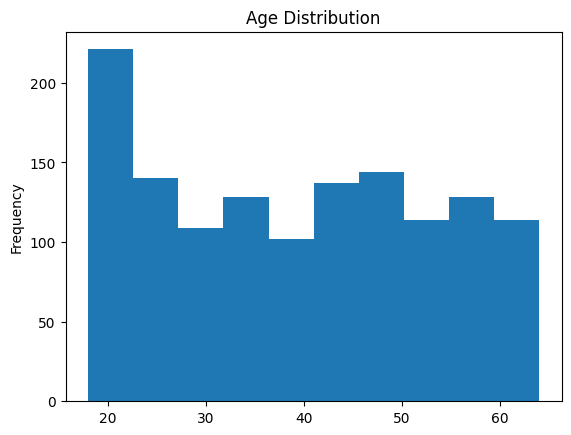

In [74]:
insurance_data1['age'].plot(kind = 'hist')
plt.title("Age Distribution")
plt.show()

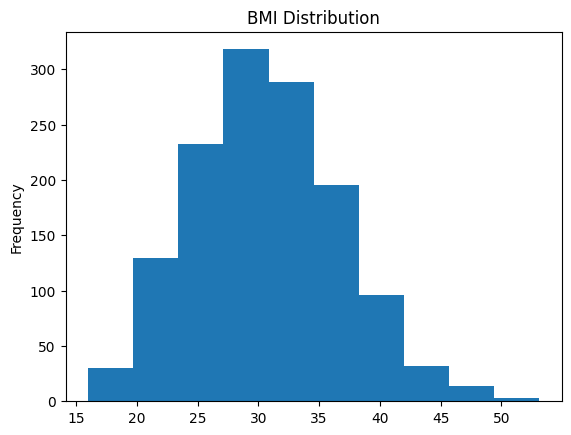

In [75]:
insurance_data1['bmi'].plot(kind = 'hist')
plt.title("BMI Distribution")
plt.show()

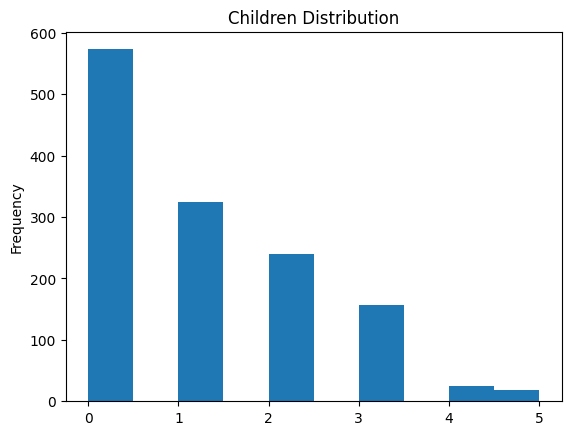

In [77]:
insurance_data1['children'].plot(kind = 'hist')
plt.title("Children Distribution")
plt.show()

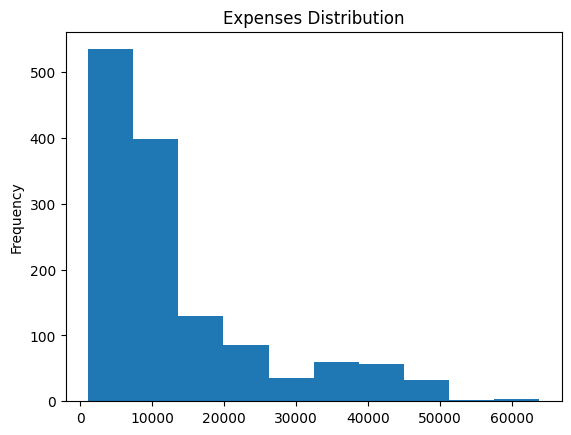

In [80]:
insurance_data1['expenses'].plot(kind = 'hist')
plt.title("Expenses Distribution")
plt.show()

In [81]:
Categorical_Columns

['sex', 'smoker', 'region']

<Axes: xlabel='children'>

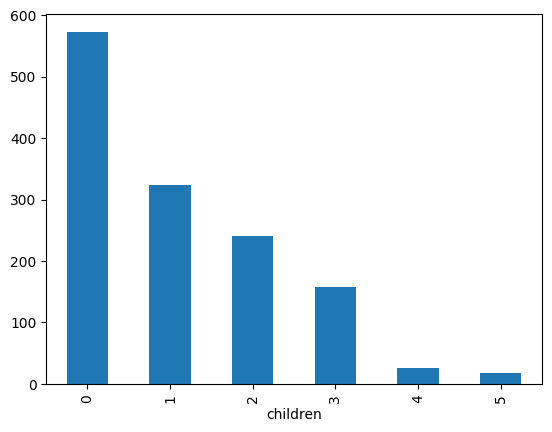

In [84]:
insurance_data1["children"].value_counts().plot(kind = 'bar')

<Axes: xlabel='sex'>

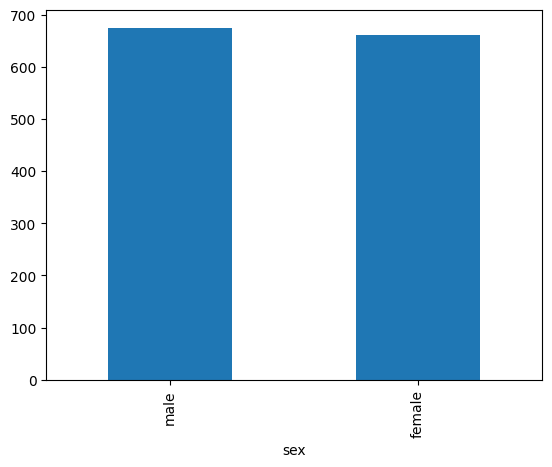

In [85]:
insurance_data1["sex"].value_counts().plot(kind = 'bar')

<Axes: xlabel='region'>

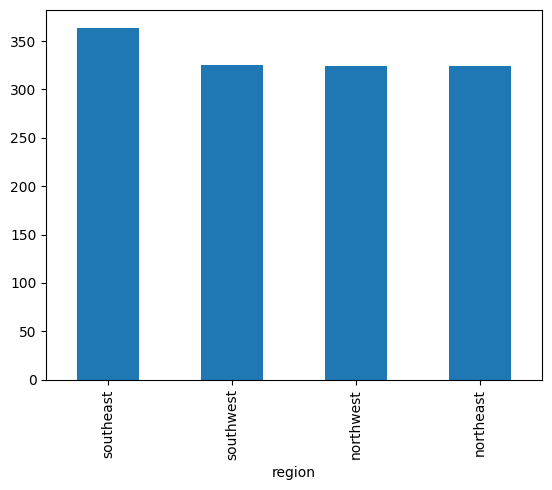

In [86]:
insurance_data1["region"].value_counts().plot(kind = 'bar')

In [87]:
# Box plots to check outliers
Numerical_Columns

['age', 'bmi', 'children', 'expenses']

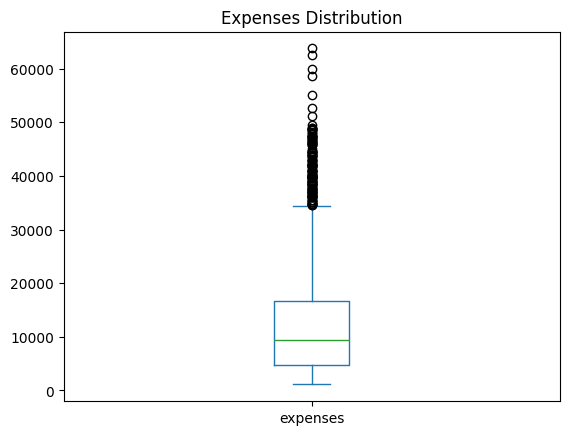

In [88]:
insurance_data1['expenses'].plot(kind = 'box')
plt.title("Expenses Distribution")
plt.show()

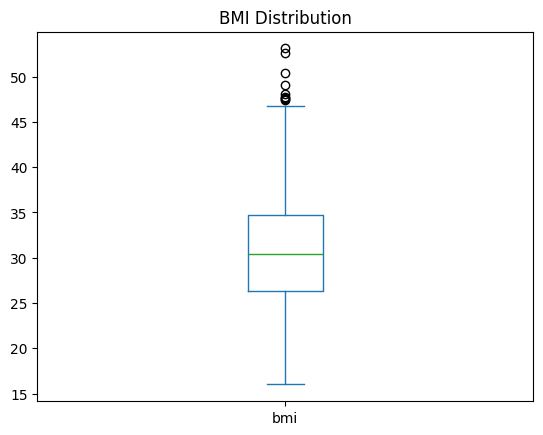

In [89]:
insurance_data1['bmi'].plot(kind = 'box')
plt.title("BMI Distribution")
plt.show()

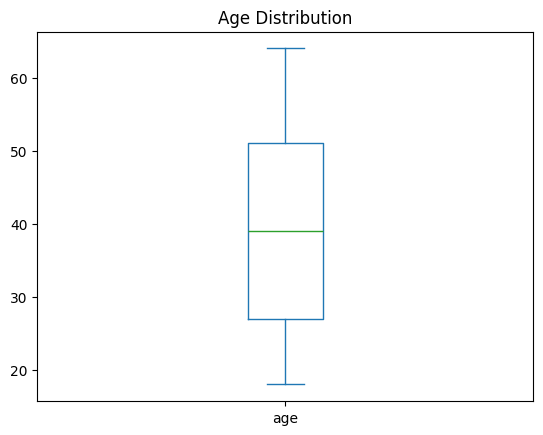

In [90]:
insurance_data1['age'].plot(kind = 'box')
plt.title("Age Distribution")
plt.show()

In [91]:
# Pie chart for region wise data distribution
region_count = insurance_data1['region'].value_counts()
region_count


,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


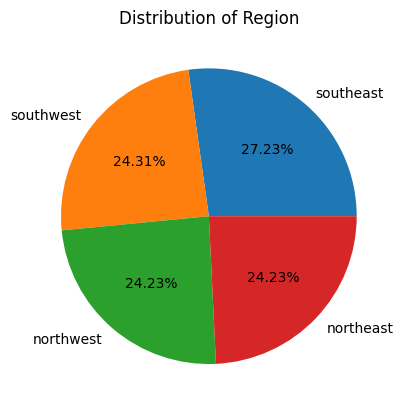

In [108]:
plt.pie(region_count,
        labels=region_count.index,
        autopct='%.2f%%',
        )
plt.title('Distribution of Region')
plt.show()

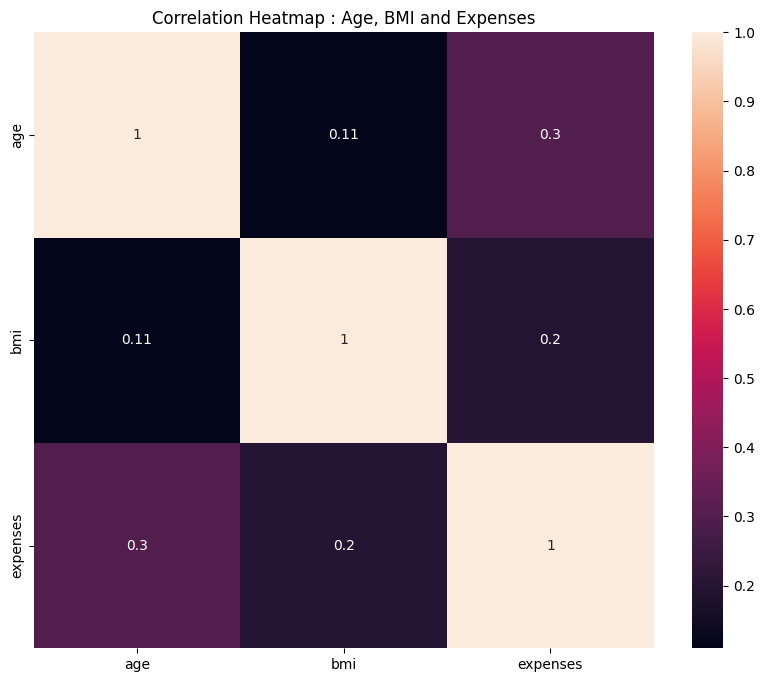

In [111]:
# Checking coreelation of numberical data
corr_data = insurance_data1[['age','bmi','expenses']].corr()

plt.figure(figsize=(10,8)) # the figure size
sns.heatmap(corr_data,annot=True)
plt.title("Correlation Heatmap : Age, BMI and Expenses")
plt.show()

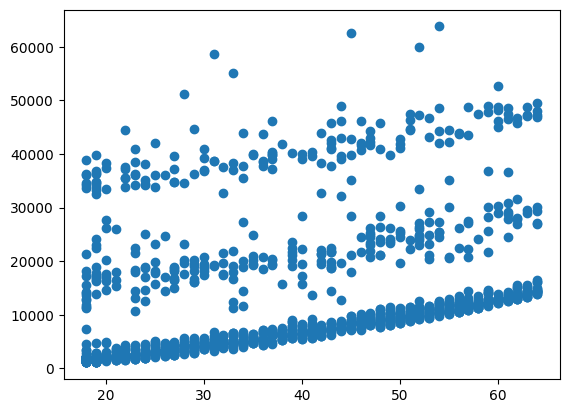

In [114]:
# Scatter plots to compare numerical data
plt.scatter(data = insurance_data1, x = 'age', y = 'expenses')

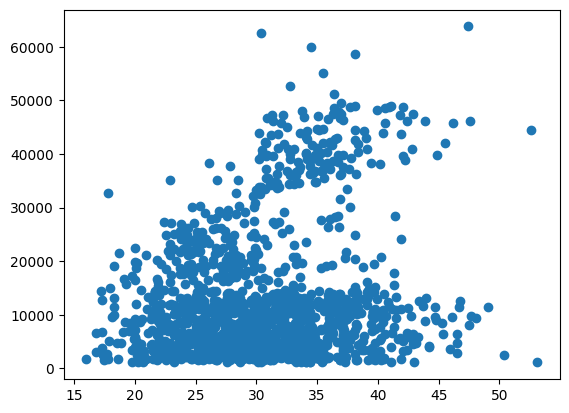

In [115]:
plt.scatter(data = insurance_data1, x = 'bmi', y = 'expenses')

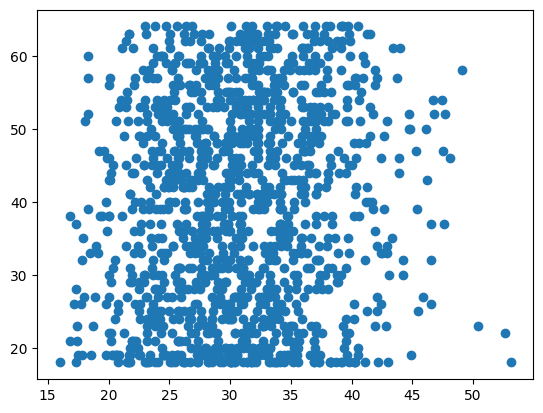

In [116]:
plt.scatter(data = insurance_data1, x = 'bmi', y = 'age')

In [122]:
# Calculating insurance cost for Smoker and Non-smoker
smoker_df = insurance_data1.groupby("smoker")["expenses"].mean().reset_index()
smoker_df

,smoker,expenses
0,no,8440.660461
1,yes,32050.231971


<Axes: xlabel='smoker'>

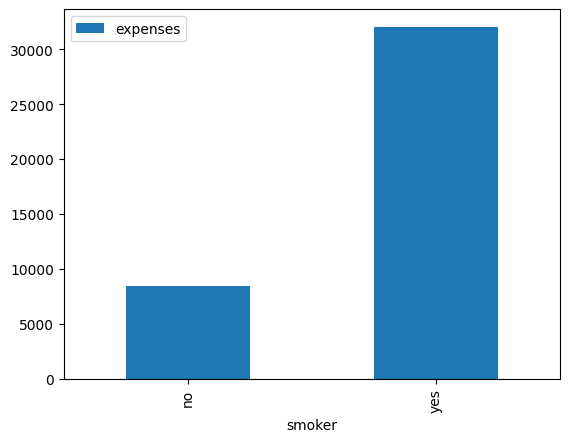

In [120]:
smoker_df.plot(kind = 'bar', x = 'smoker', y = 'expenses')

In [124]:
# Calculating insurance cost for male and female
gender_df = insurance_data1.groupby("sex")["expenses"].mean().reset_index()
gender_df

,sex,expenses
0,female,12569.578897
1,male,13974.999111


<Axes: xlabel='sex'>

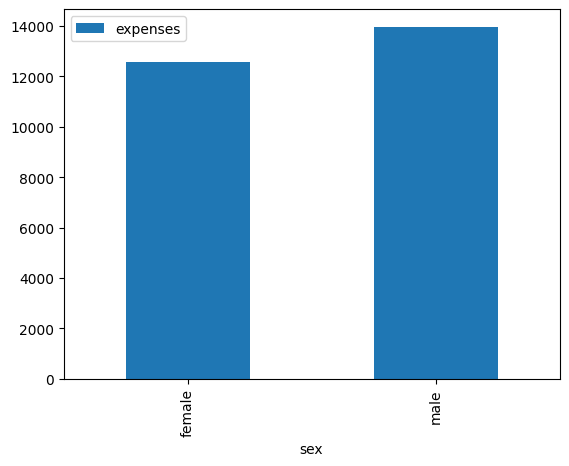

In [125]:
gender_df.plot(kind = 'bar', x = 'sex', y = 'expenses')

In [126]:
# Calculating region-wise insurance cost
region_df = insurance_data1.groupby("region")["expenses"].mean().reset_index()
region_df

,region,expenses
0,northeast,13406.384691
1,northwest,12450.840648
2,southeast,14735.411538
3,southwest,12346.937908


<Axes: xlabel='region'>

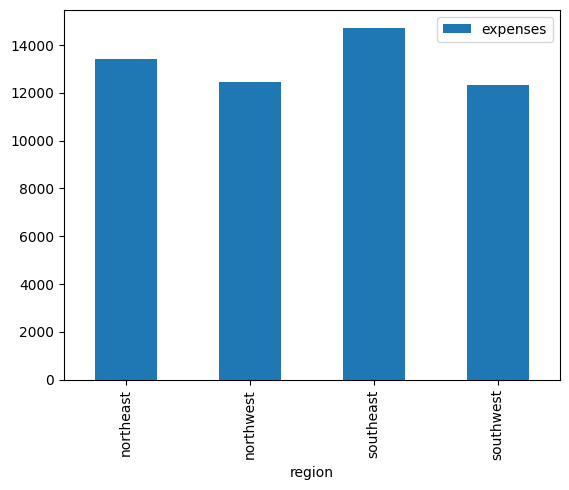

In [127]:
region_df.plot(kind = 'bar', x = 'region', y = 'expenses')

In [128]:
# Checking region-wise BMI
region_bmi_df = insurance_data1.groupby("region")["bmi"].mean().reset_index()
region_bmi_df

,region,bmi
0,northeast,29.176235
1,northwest,29.197531
2,southeast,33.359341
3,southwest,30.596615


<Axes: xlabel='region'>

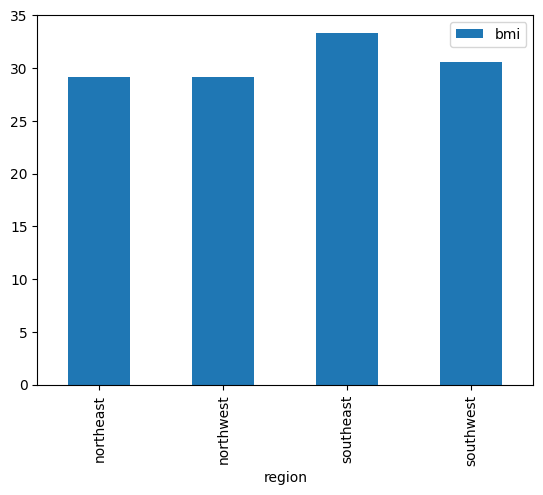

In [129]:
region_bmi_df.plot(kind = 'bar', x = 'region', y = 'bmi')

In [132]:
# Checking region-wise male, female and cost of insurance

insurance_data1.groupby(["region","sex"])["sex"].count()

region     sex   
northeast  female    161
           male      163
northwest  female    164
           male      160
southeast  female    175
           male      189
southwest  female    162
           male      163
Name: sex, dtype: int64